In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

import os

In [4]:
data_dir = os.path.abspath('../raw')
# imr_5yr_loc = os.path.join(data_dir, 'InfantMortality_Cluster5Year.csv')
imr_5yr_loc = os.path.join(data_dir, 'InfantMortality_Cluster5Year_intensities.csv')
# imr_5yr_intensities = pd.read_csv(imr_5yr_intensities_loc)

imr_1yr_loc = os.path.join(data_dir, 'InfantMortality_ClusterYear.csv')
mat_ed_loc = os.path.join(data_dir, 'MaternalEducation_cluster.csv')

# Infant Mortality Rate - 5 year clusters
Analysis of data

In [5]:
imr_5yr = pd.read_csv(imr_5yr_loc)
imr_5yr['mean_intensity'] = imr_5yr['mean_intensity']/255
imr_5yr['std_intensity'] = imr_5yr['std_intensity']/255
imr_5yr

,Unnamed: 0,cluster_id,yrgroup,country,imr,nbirth,lat,lon,mean_intensity,std_intensity
0,922,AO2015_1,2001-2005,Angola,0.055556,18,-12.101381,14.140703,0.000292,0.017092
1,923,AO2015_1,2006-2010,Angola,0.173913,23,-12.101381,14.140703,0.000292,0.017092
2,924,AO2015_1,2011-2015,Angola,0.142857,35,-12.101381,14.140703,0.000292,0.017092
3,925,AO2015_10,2001-2005,Angola,0.000000,19,-8.828197,13.335400,0.806480,0.395057
4,926,AO2015_10,2006-2010,Angola,0.043478,23,-8.828197,13.335400,0.806480,0.395057
...,...,...,...,...,...,...,...,...,...,...
30974,125256,ZW2015_98,2006-2010,Zimbabwe,0.000000,8,-20.131983,28.513421,0.484172,0.499749
30975,125257,ZW2015_98,2011-2015,Zimbabwe,0.000000,10,-20.131983,28.513421,0.484172,0.499749
30976,125258,ZW2015_99,2001-2005,Zimbabwe,0.000000,6,-20.940917,29.031395,0.070634,0.256213
30977,125259,ZW2015_99,2006-2010,Zimbabwe,0.000000,13,-20.940917,29.031395,0.070634,0.256213


In [6]:
num_rows = len(imr_5yr)
num_rows_0imr = len(imr_5yr[imr_5yr.imr == 0])
print('Number of cluster measurements:', num_rows)
print('Number of cluster measurements with imr 0:', num_rows_0imr)
print('Percentage:', num_rows_0imr / num_rows)
print('Number of unique clusters:', imr_5yr['cluster_id'].nunique())
print('Number of countries surveyed:', imr_5yr['country'].nunique())
imr_5yr.drop_duplicates(['lat','lon']).iloc[0]['lon']

print('Mean global light intensity across clusters: {}'.format(imr_5yr['mean_intensity'].mean()))
print('Mean global standard deviation of light intensity across clusters: {}'.format(imr_5yr['std_intensity'].mean()))


Number of cluster measurements: 30979
Number of cluster measurements with imr 0: 17784
Percentage: 0.5740663029794377
Number of unique clusters: 10507
Number of countries surveyed: 15
Mean global light intensity across clusters: 0.13081364084893504
Mean global standard deviation of light intensity across clusters: 0.17994373601017638


### Plotting cluster geolocation

In [7]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.at[world.iso_a3=='TLS', 'name'] = 'Timor'

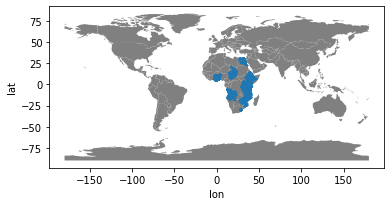

In [8]:
ax = world.plot(color="grey")
imr_5yr.plot(ax=ax, x='lon', y='lat', kind='scatter', s=0.1)

These are low-res polygons for the countries. Is there a better source?

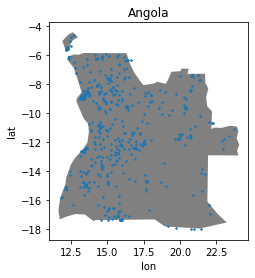

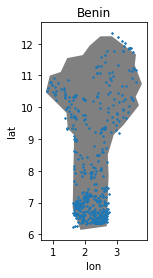

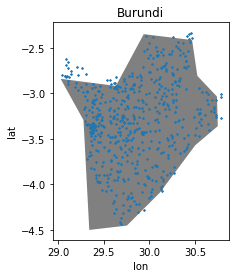

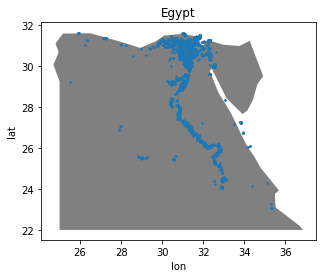

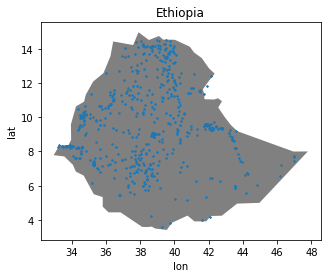

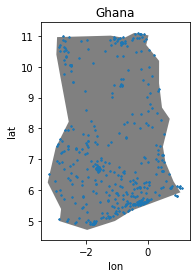

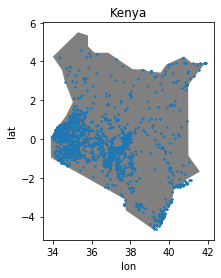

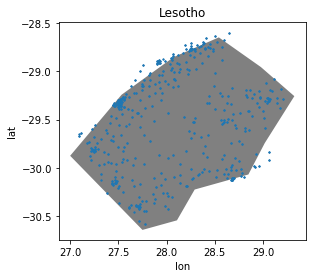

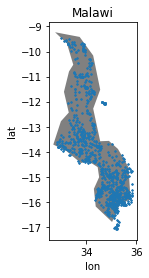

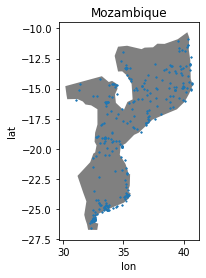

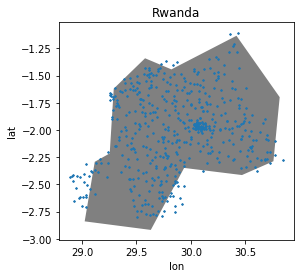

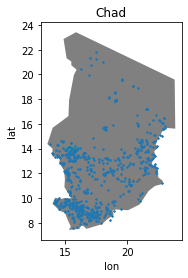

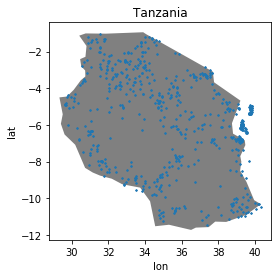

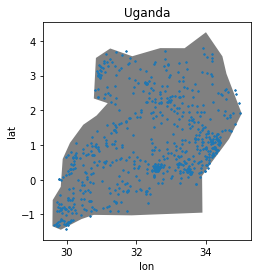

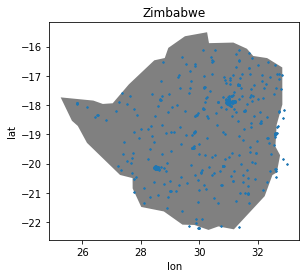

In [9]:
countries = imr_5yr.country.unique()
for country in countries:
    ax = world.loc[world.name==country].plot(color='grey')
    ax.set_title(country)
    imr_5yr.loc[imr_5yr.country==country].plot(ax=ax, x='lon', y='lat', kind='scatter', s=1)

# Country level statistics
Adding number of deaths as column

In [10]:
imr_5yr['ndeath'] = imr_5yr.imr * imr_5yr.nbirth

In [11]:
country_level_imr = imr_5yr.groupby(by=['country', 'yrgroup'])[['ndeath', 'nbirth']].sum()
country_level_imr['imr'] = country_level_imr.ndeath / country_level_imr.nbirth
country_level_imr['mean_intensity'] = imr_5yr.groupby(by=['country', 'yrgroup'])[['mean_intensity']].mean()
country_level_imr['std_intensity'] = imr_5yr.groupby(by=['country', 'yrgroup'])[['std_intensity']].mean()
country_level_imr

ndeath  nbirth       imr  mean_intensity  std_intensity
country    yrgroup                                                           
Angola     2001-2005   552.0    7681  0.071866        0.198804       0.224694
           2006-2010   568.0   11280  0.050355        0.198171       0.224052
           2011-2015   566.0   14170  0.039944        0.198171       0.224052
Benin      2001-2005   787.0   12991  0.060580        0.169466       0.231956
           2006-2010   691.0   10521  0.065678        0.169466       0.231956
           2011-2015   724.0   12440  0.058199        0.169466       0.231956
Burundi    2001-2005   781.0   11215  0.069639        0.044410       0.094934
           2006-2010   629.0   12058  0.052165        0.044410       0.094934
           2011-2015   561.0   12886  0.043536        0.044410       0.094934
Chad       2001-2005  1153.0   14645  0.078730        0.083937       0.103197
           2006-2010  1649.0   20685  0.079720        0.083937       0.103197
           2011-2015   886.0   14767  0.059999        0.083937       0.103197
Egypt      2001-2005   360.0   11834  0.030421        0.283750       0.340277
           2006-2010   387.0   14211  0.027232        0.281919       0.339617
           2011-2015   228.0   11143  0.020461        0.277897       0.337997
Ethiopia   2001-2005   639.0    8836  0.072318        0.111235       0.131138
           2006-2010   754.0   10575  0.071300        0.112474       0.131445
           2011-2015   494.0   10230  0.048289        0.112474       0.131445
Ghana      2001-2005   258.0    4693  0.054975        0.210821       0.238097
           2006-2010   288.0    5528  0.052098        0.210090       0.237477
           2011-2015   180.0    4575  0.039344        0.210821       0.238097
Kenya      2001-2005   834.0   18590  0.044863        0.074873       0.145137
           2006-2010   860.0   21949  0.039182        0.075457       0.146080
           2011-2015   502.0   15133  0.033173        0.075418       0.145926
Lesotho    2001-2005   171.0    2400  0.071250        0.061761       0.121684
           2006-2010   211.0    2884  0.073162        0.061152       0.121355
           2011-2015   147.0    2503  0.058730        0.061595       0.121902
Malawi     2001-2005   841.0   14611  0.057559        0.041108       0.113001
           2006-2010   847.0   17308  0.048937        0.041108       0.113001
           2011-2015   669.0   16999  0.039355        0.041108       0.113001
Mozambique 2006-2010    29.0    1495  0.019398        0.162366       0.176713
           2011-2015   119.0    4861  0.024481        0.162376       0.176141
Rwanda     2001-2005   499.0    6829  0.073071        0.066003       0.128041
           2006-2010   321.0    7810  0.041101        0.066003       0.128041
           2011-2015   209.0    6609  0.031624        0.066003       0.128041
Tanzania   2001-2005   445.0    7207  0.061746        0.108136       0.150865
           2006-2010   515.0    9046  0.056931        0.108811       0.151164
           2011-2015   401.0    9989  0.040144        0.108811       0.151164
Uganda     2001-2005   854.0   12751  0.066975        0.088315       0.101577
           2006-2010   770.0   14024  0.054906        0.088315       0.101577
           2011-2015   625.0   15242  0.041005        0.088315       0.101577
Zimbabwe   2001-2005   189.0    3993  0.047333        0.109520       0.181915
           2006-2010   353.0    5266  0.067034        0.109520       0.181915
           2011-2015   248.0    5794  0.042803        0.108142       0.181183

### Plotting Country Level IMR by year group

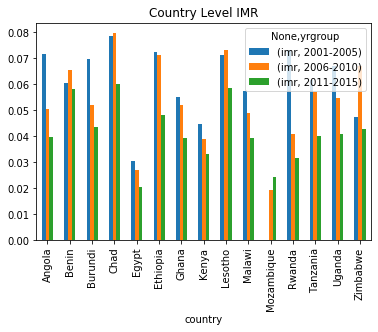

In [12]:
unstacked_country_level_imr = country_level_imr[['imr']].unstack()
unstacked_country_level_imr.plot(kind = 'bar', title='Country Level IMR')

### Plotting on Map

In [13]:
country_level_imr_flat = country_level_imr.reset_index()
country_level_imr_latest = country_level_imr_flat[country_level_imr_flat.yrgroup == '2011-2015']
merged_imr = pd.merge(country_level_imr_latest, world, left_on='country', right_on='name', how='right') 
merged_imr

,country,yrgroup,ndeath,nbirth,imr,mean_intensity,std_intensity,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,Angola,2011-2015,566.0,14170.0,0.039944,0.198171,0.224052,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
1,Benin,2011-2015,724.0,12440.0,0.058199,0.169466,0.231956,8791832.0,Africa,Benin,BEN,12830.0,"POLYGON ((2.691701694356254 6.258817246928629,..."
2,Burundi,2011-2015,561.0,12886.0,0.043536,0.044410,0.094934,8988091.0,Africa,Burundi,BDI,3102.0,POLYGON ((29.33999759290035 -4.499983412294092...
3,Chad,2011-2015,886.0,14767.0,0.059999,0.083937,0.103197,10329208.0,Africa,Chad,TCD,15860.0,"POLYGON ((14.4957873877629 12.85939626713736, ..."
4,Egypt,2011-2015,228.0,11143.0,0.020461,0.277897,0.337997,83082869.0,Africa,Egypt,EGY,443700.0,"POLYGON ((34.9226 29.50133, 34.64174 29.09942,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86967524.0,Asia,Vietnam,VNM,241700.0,"POLYGON ((108.0501802917829 21.55237986906012,..."
173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,218519.0,Oceania,Vanuatu,VUT,988.5,(POLYGON ((167.8448767438451 -16.4663331030971...
174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23822783.0,Asia,Yemen,YEM,55280.0,"POLYGON ((53.10857262554751 16.65105113368895,..."
175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49052489.0,Africa,South Africa,ZAF,491000.0,POLYGON ((31.52100141777888 -29.25738697684626...


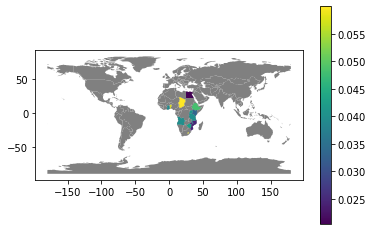

In [14]:
# fig, ax = plt.subplots(1, 1)
ax = world.plot(color="grey")
gpd.GeoDataFrame(merged_imr).dropna().plot(column='imr', ax=ax, legend=True)

# Maternal Education
For maternal education, the observation is a “cluster” x education category.  there are 4 maternal education categories given in variable mother_ed_cat:

| category | level of education        |  
|---|---------------------|
| 0 | no education        |  
| 1 | primary education   |
| 2 | secondary education |
| 3 | higher education    |

In [15]:
mat_ed = pd.read_csv(mat_ed_loc)
mat_ed

,country,cluster_id,svy_yr,mother_ed_cat,pct,ntot,lat,lon
0,Armenia,AM2015_1,2015,2.0,0.166667,12,40.208171,44.471346
1,Armenia,AM2015_1,2015,3.0,0.833333,12,40.208171,44.471346
2,Armenia,AM2015_10,2015,2.0,0.111111,9,40.202011,44.511379
3,Armenia,AM2015_10,2015,3.0,0.888889,9,40.202011,44.511379
4,Armenia,AM2015_100,2015,2.0,0.571429,14,40.141674,44.034517
...,...,...,...,...,...,...,...,...
130414,Zimbabwe,ZW2015_98,2015,2.0,0.937500,16,-20.131983,28.513421
130415,Zimbabwe,ZW2015_98,2015,3.0,0.062500,16,-20.131983,28.513421
130416,Zimbabwe,ZW2015_99,2015,1.0,0.095238,21,-20.940917,29.031395
130417,Zimbabwe,ZW2015_99,2015,2.0,0.857143,21,-20.940917,29.031395


In [16]:
num_rows = len(mat_ed)
print('Number of cluster measurements:', num_rows)
print('Number of unique clusters:', imr_5yr['cluster_id'].nunique())
print('Number of countries surveyed:', imr_5yr['country'].nunique())

Number of cluster measurements: 130419
Number of unique clusters: 10507
Number of countries surveyed: 15


In [17]:
mat_ed.svy_yr.value_counts()

2015    96306
2014    18525
2016     9705
2017     5883
Name: svy_yr, dtype: int64

# Country level statistics
Adding raw number of educated as column

In [18]:
mat_ed['npercat'] = mat_ed.pct * mat_ed.ntot

Each country has one survey year, which differs from country to country

In [19]:
country_level_ed = mat_ed.groupby(by=['country', 'mother_ed_cat'])[['npercat']].sum()
# country_level_ed['pct'] = country_level_ed.npercat / country_level_ed.ntot 
country_level_ed = country_level_ed.unstack()['npercat']
country_level_ed['ntot'] = country_level_ed[0.0] + country_level_ed[1.0] + country_level_ed[2.0] + country_level_ed[3.0]
country_level_ed['pct0'] = country_level_ed[0.0] / country_level_ed['ntot']
country_level_ed['pct1'] = country_level_ed[1.0] / country_level_ed['ntot']
country_level_ed['pct2'] = country_level_ed[2.0] / country_level_ed['ntot']
country_level_ed['pct3'] = country_level_ed[3.0] / country_level_ed['ntot']
country_level_ed = country_level_ed[['pct0', 'pct1', 'pct2', 'pct3', 'ntot']]
country_level_ed

mother_ed_cat,pct0,pct1,pct2,pct3,ntot
country,,,,,
Angola,0.323376,0.364729,0.286060,0.025834,11148.0
Armenia,0.000735,0.054889,0.451360,0.493016,4081.0
Bangladesh,0.251499,0.302710,0.362228,0.083562,16012.0
Benin,0.655875,0.180768,0.149182,0.014174,11429.0
Burundi,0.468424,0.392679,0.128749,0.010148,11037.0
Cambodia,0.163581,0.518048,0.290980,0.027391,11719.0
Chad,0.736872,0.178034,0.079582,0.005513,14149.0
Egypt,0.229405,0.101652,0.525693,0.143250,19616.0
Ethiopia,0.596024,0.269551,0.086537,0.047887,9961.0


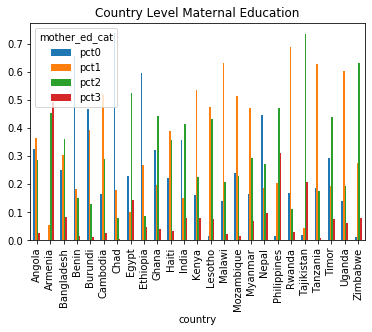

In [20]:
country_level_ed[['pct0', 'pct1', 'pct2', 'pct3']].plot(kind = 'bar', title='Country Level Maternal Education')

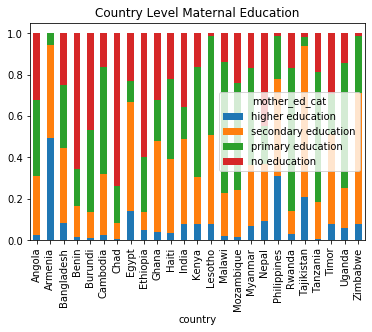

In [21]:
# country_level_ed[['pct0', 'pct1', 'pct2', 'pct3']].plot.bar(stacked=True, title='Country Level Maternal Education')
cat_to_meaning = {
    'pct3': 'higher education', 'pct2': 'secondary education', 'pct1': 'primary education', 'pct0': 'no education'
}

country_level_ed[['pct3', 'pct2', 'pct1', 'pct0']].rename(columns=cat_to_meaning) \
    .plot.bar(stacked=True, title='Country Level Maternal Education')

In [22]:
merged_mat_ed = pd.merge(country_level_ed, world, left_on='country', right_on='name', how='left') 
merged_mat_ed

,pct0,pct1,pct2,pct3,ntot,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,0.323376,0.364729,0.286060,0.025834,11148.0,1.279929e+07,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
1,0.000735,0.054889,0.451360,0.493016,4081.0,2.967004e+06,Asia,Armenia,ARM,18770.0,"POLYGON ((43.58274580259273 41.09214325618257,..."
2,0.251499,0.302710,0.362228,0.083562,16012.0,1.560509e+08,Asia,Bangladesh,BGD,224000.0,"POLYGON ((92.67272098182556 22.04123891854125,..."
3,0.655875,0.180768,0.149182,0.014174,11429.0,8.791832e+06,Africa,Benin,BEN,12830.0,"POLYGON ((2.691701694356254 6.258817246928629,..."
4,0.468424,0.392679,0.128749,0.010148,11037.0,8.988091e+06,Africa,Burundi,BDI,3102.0,POLYGON ((29.33999759290035 -4.499983412294092...
5,0.163581,0.518048,0.290980,0.027391,11719.0,1.449429e+07,Asia,Cambodia,KHM,27940.0,"POLYGON ((103.4972799011397 10.63255544681593,..."
6,0.736872,0.178034,0.079582,0.005513,14149.0,1.032921e+07,Africa,Chad,TCD,15860.0,"POLYGON ((14.4957873877629 12.85939626713736, ..."
7,0.229405,0.101652,0.525693,0.143250,19616.0,8.308287e+07,Africa,Egypt,EGY,443700.0,"POLYGON ((34.9226 29.50133, 34.64174 29.09942,..."
8,0.596024,0.269551,0.086537,0.047887,9961.0,8.523734e+07,Africa,Ethiopia,ETH,68770.0,"POLYGON ((37.90607000000011 14.95943000000017,..."
9,0.322907,0.197168,0.441488,0.038438,6426.0,2.383250e+07,Africa,Ghana,GHA,34200.0,"POLYGON ((1.060121697604927 5.928837388528876,..."


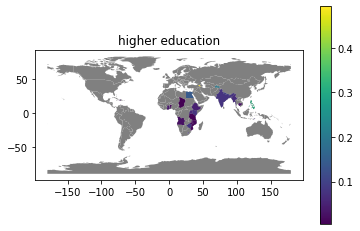

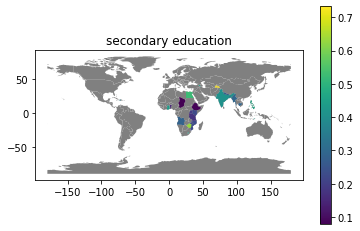

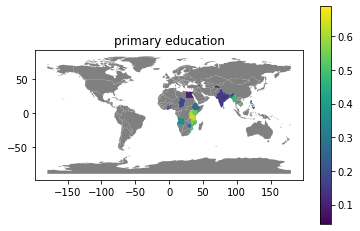

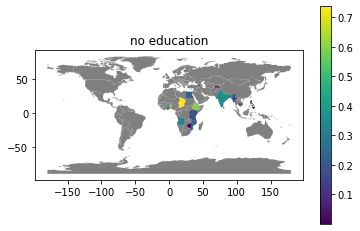

In [23]:
# fig, ax = plt.subplots(1, 1)
for col in ['pct3', 'pct2', 'pct1', 'pct0']:
    ax = world.plot(color="grey")
    ax.set_title(cat_to_meaning[col])
    gpd.GeoDataFrame(merged_mat_ed).dropna().plot(column=col, ax=ax, legend=True)

# Correlations

### Country Level

In [24]:
country_level_imr_flat = country_level_imr.reset_index()
country_level_imr_recent = country_level_imr_flat.loc[country_level_imr_flat.yrgroup=='2011-2015']
country_level_imr_recent
country_level_ed_flat = country_level_ed.reset_index()
country_level_combined = pd.merge(country_level_ed_flat, country_level_imr_recent, on='country')
country_level_combined

,country,pct0,pct1,pct2,pct3,ntot,yrgroup,ndeath,nbirth,imr,mean_intensity,std_intensity
0,Angola,0.323376,0.364729,0.286060,0.025834,11148.0,2011-2015,566.0,14170,0.039944,0.198171,0.224052
1,Benin,0.655875,0.180768,0.149182,0.014174,11429.0,2011-2015,724.0,12440,0.058199,0.169466,0.231956
2,Burundi,0.468424,0.392679,0.128749,0.010148,11037.0,2011-2015,561.0,12886,0.043536,0.044410,0.094934
3,Chad,0.736872,0.178034,0.079582,0.005513,14149.0,2011-2015,886.0,14767,0.059999,0.083937,0.103197
4,Egypt,0.229405,0.101652,0.525693,0.143250,19616.0,2011-2015,228.0,11143,0.020461,0.277897,0.337997
5,Ethiopia,0.596024,0.269551,0.086537,0.047887,9961.0,2011-2015,494.0,10230,0.048289,0.112474,0.131445
6,Ghana,0.322907,0.197168,0.441488,0.038438,6426.0,2011-2015,180.0,4575,0.039344,0.210821,0.238097
7,Kenya,0.160809,0.533633,0.226863,0.078694,23102.0,2011-2015,502.0,15133,0.033173,0.075418,0.145926
8,Lesotho,0.015436,0.475193,0.432415,0.076957,4535.0,2011-2015,147.0,2503,0.058730,0.061595,0.121902
9,Malawi,0.139590,0.630922,0.206408,0.023081,18977.0,2011-2015,669.0,16999,0.039355,0.041108,0.113001


Pearson correlation of higher education and imr: -0.35746244663080357
Pearson correlation of secondary education and imr: -0.243730825502028
Pearson correlation of primary education and imr: -0.24072707895089296
Pearson correlation of no education and imr: 0.4531810986078639


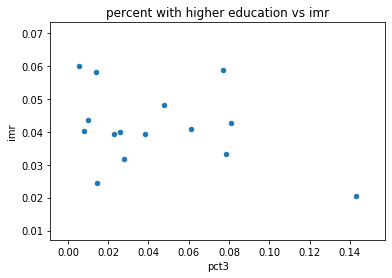

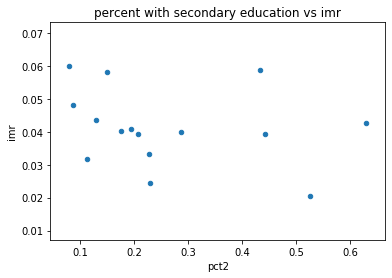

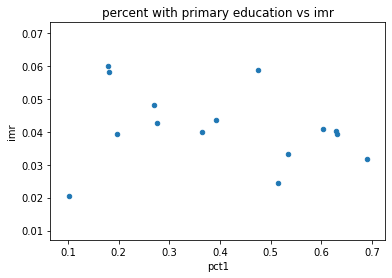

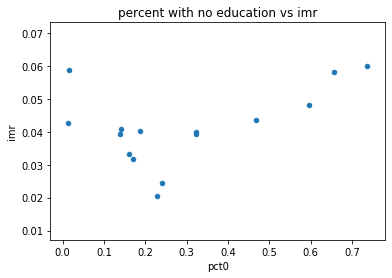

In [25]:
for ed_cat, level in cat_to_meaning.items():
    title = "percent with {} vs imr".format(level)
    country_level_combined.plot(x=ed_cat, y='imr', kind='scatter', title=title)
    corr = country_level_combined[[ed_cat, 'imr']].corr('pearson').loc[ed_cat, 'imr']
    print('Pearson correlation of {} and imr: {}'.format(level, corr))

### Per country correlations at the cluster level

In [26]:
imr_5yr_recent = imr_5yr.loc[imr_5yr.yrgroup=='2011-2015']
imr_5yr_recent

,Unnamed: 0,cluster_id,yrgroup,country,imr,nbirth,lat,lon,mean_intensity,std_intensity,ndeath
2,924,AO2015_1,2011-2015,Angola,0.142857,35,-12.101381,14.140703,0.000292,0.017092,5.0
5,927,AO2015_10,2011-2015,Angola,0.071429,28,-8.828197,13.335400,0.806480,0.395057,2.0
8,930,AO2015_100,2011-2015,Angola,0.000000,14,-15.186028,12.160149,0.336207,0.472411,0.0
11,933,AO2015_101,2011-2015,Angola,0.090909,33,-9.268570,15.229294,0.036266,0.186952,3.0
14,936,AO2015_102,2011-2015,Angola,0.040000,25,-12.472245,16.470441,0.000000,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...
30966,125248,ZW2015_95,2011-2015,Zimbabwe,0.066667,15,-18.341095,29.890007,0.229791,0.420698,1.0
30969,125251,ZW2015_96,2011-2015,Zimbabwe,0.000000,15,-21.357135,30.645874,0.006396,0.079719,0.0
30972,125254,ZW2015_97,2011-2015,Zimbabwe,0.000000,16,-19.452031,29.773865,0.233748,0.423214,0.0
30975,125257,ZW2015_98,2011-2015,Zimbabwe,0.000000,10,-20.131983,28.513421,0.484172,0.499749,0.0


In [28]:
mat_ed_flat = mat_ed
for cat in range(4):
    col = 'pct{}'.format(cat)
    meaning = cat_to_meaning[col]
    mat_ed_flat.loc[mat_ed_flat.mother_ed_cat==cat, '{}_pct'.format(meaning)] = mat_ed_flat.pct
    
mat_ed_flat = mat_ed_flat.groupby('cluster_id').agg(max).fillna(0)
mat_ed_flat = mat_ed_flat[['country', 'svy_yr', 'ntot', 'lat', 'lon',
                           'no education_pct', 'primary education_pct',
                           'secondary education_pct', 'higher education_pct']].reset_index()
mat_ed_flat

#mat_ed_flat['primary education_pct']['primary education_pct']

KeyError: 'primary education_pct'

In [30]:
print(imr_5yr_recent)
cluster_level_combined = pd.merge(mat_ed_flat, imr_5yr_recent[['cluster_id', 'imr', 'mean_intensity', 'std_intensity']], on='cluster_id', how='inner')
cluster_level_combined

       Unnamed: 0  cluster_id    yrgroup   country       imr  nbirth  \
2             924    AO2015_1  2011-2015    Angola  0.142857      35   
5             927   AO2015_10  2011-2015    Angola  0.071429      28   
8             930  AO2015_100  2011-2015    Angola  0.000000      14   
11            933  AO2015_101  2011-2015    Angola  0.090909      33   
14            936  AO2015_102  2011-2015    Angola  0.040000      25   
...           ...         ...        ...       ...       ...     ...   
30966      125248   ZW2015_95  2011-2015  Zimbabwe  0.066667      15   
30969      125251   ZW2015_96  2011-2015  Zimbabwe  0.000000      15   
30972      125254   ZW2015_97  2011-2015  Zimbabwe  0.000000      16   
30975      125257   ZW2015_98  2011-2015  Zimbabwe  0.000000      10   
30978      125260   ZW2015_99  2011-2015  Zimbabwe  0.052632      19   

             lat        lon  mean_intensity  std_intensity  ndeath  
2     -12.101381  14.140703        0.000292       0.017092     5.0

,cluster_id,country,svy_yr,ntot,lat,lon,no education_pct,primary education_pct,secondary education_pct,higher education_pct,imr,mean_intensity,std_intensity
0,AO2015_1,Angola,2015,19,-12.101381,14.140703,0.789474,0.210526,0.000000,0.000000,0.142857,0.000292,0.017092
1,AO2015_10,Angola,2015,18,-8.828197,13.335400,0.166667,0.555556,0.277778,0.000000,0.071429,0.806480,0.395057
2,AO2015_100,Angola,2015,16,-15.186028,12.160149,0.000000,0.125000,0.562500,0.312500,0.000000,0.336207,0.472411
3,AO2015_101,Angola,2015,18,-9.268570,15.229294,0.277778,0.611111,0.111111,0.000000,0.090909,0.036266,0.186952
4,AO2015_102,Angola,2015,16,-12.472245,16.470441,0.500000,0.500000,0.000000,0.000000,0.040000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10409,ZW2015_95,Zimbabwe,2015,20,-18.341095,29.890007,0.000000,0.050000,0.850000,0.100000,0.066667,0.229791,0.420698
10410,ZW2015_96,Zimbabwe,2015,15,-21.357135,30.645874,0.000000,0.266667,0.666667,0.066667,0.000000,0.006396,0.079719
10411,ZW2015_97,Zimbabwe,2015,18,-19.452031,29.773865,0.000000,0.000000,0.833333,0.166667,0.000000,0.233748,0.423214
10412,ZW2015_98,Zimbabwe,2015,16,-20.131983,28.513421,0.000000,0.000000,0.937500,0.062500,0.000000,0.484172,0.499749


Pearson correlation of higher education and imr in Angola: -0.11800818399948852
Pearson correlation of secondary education and imr in Angola: -0.1542017266563347
Pearson correlation of primary education and imr in Angola: 0.15421522000072424
Pearson correlation of no education and imr in Angola: 0.05667142066510403
Pearson correlation of higher education and imr in Benin: -0.15000979437160894
Pearson correlation of secondary education and imr in Benin: -0.1260956005398644
Pearson correlation of primary education and imr in Benin: -0.020082064729235856
Pearson correlation of no education and imr in Benin: 0.11548469789465284
Pearson correlation of higher education and imr in Burundi: -0.06745830299815578
Pearson correlation of secondary education and imr in Burundi: -0.11607549580959138
Pearson correlation of primary education and imr in Burundi: 0.06482752144883756
Pearson correlation of no education and imr in Burundi: 0.0632550903519331
Pearson correlation of higher education and imr

C:\Users\dasha\Anaconda3\envs\geopandas\lib\site-packages\pandas\plotting\_matplotlib\core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


Pearson correlation of primary education and imr in Kenya: 0.04600555898096764
Pearson correlation of no education and imr in Kenya: -0.025304273055552603
Pearson correlation of higher education and imr in Lesotho: -0.04291045359877144
Pearson correlation of secondary education and imr in Lesotho: 0.01568306721114118
Pearson correlation of primary education and imr in Lesotho: 0.016186050616867047
Pearson correlation of no education and imr in Lesotho: -0.02438736327604463
Pearson correlation of higher education and imr in Malawi: 0.023195739403604962
Pearson correlation of secondary education and imr in Malawi: 0.0005224861339772202
Pearson correlation of primary education and imr in Malawi: -0.019118452694953887
Pearson correlation of no education and imr in Malawi: 0.01273830794928643
Pearson correlation of higher education and imr in Mozambique: -0.034301976802805195
Pearson correlation of secondary education and imr in Mozambique: -0.02961428713943222
Pearson correlation of primar

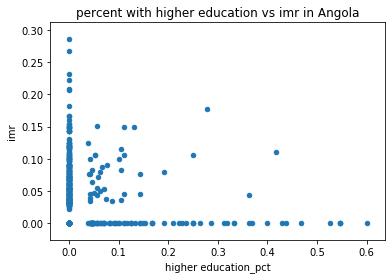

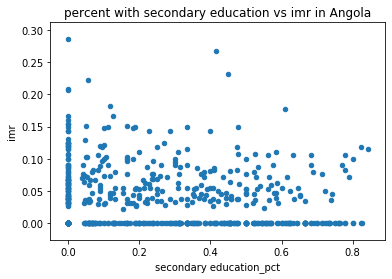

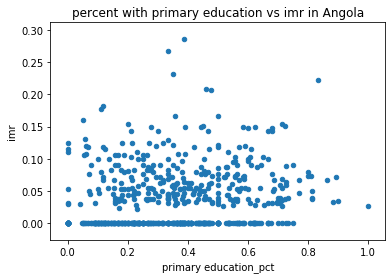

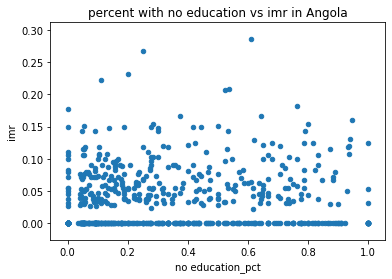

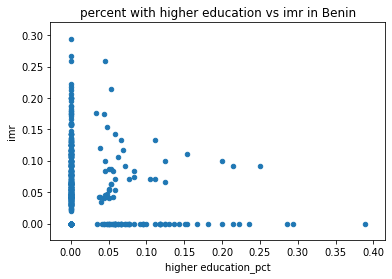

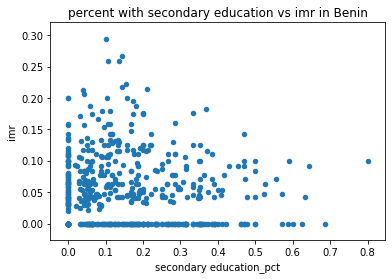

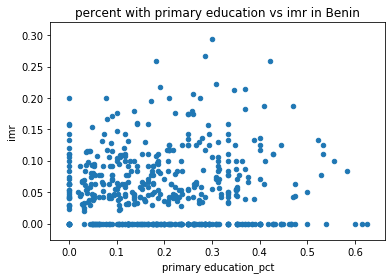

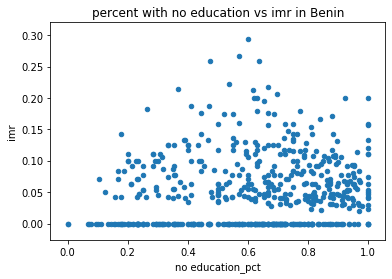

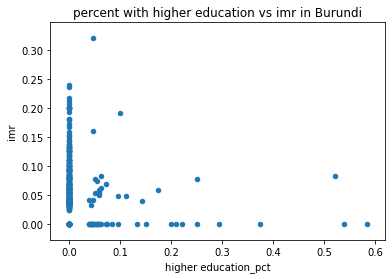

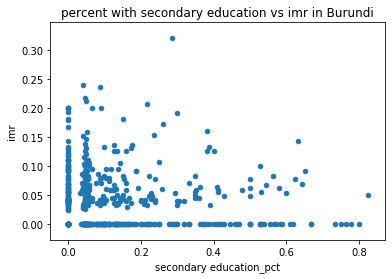

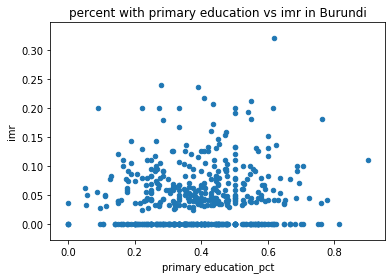

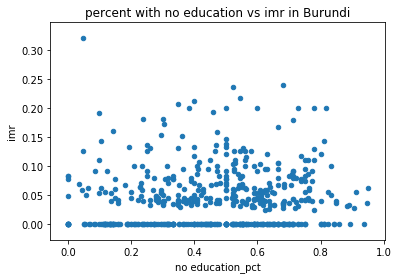

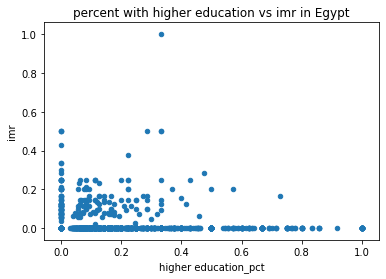

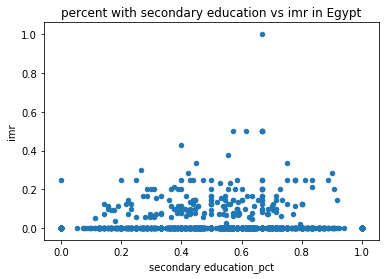

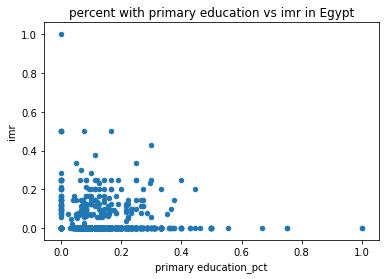

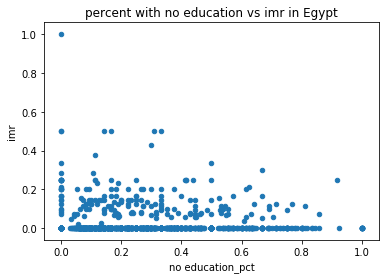

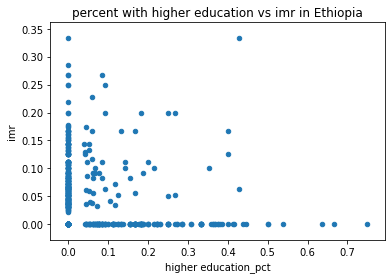

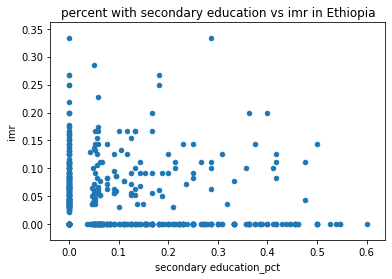

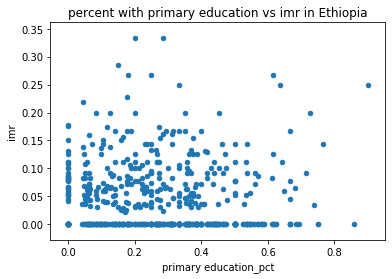

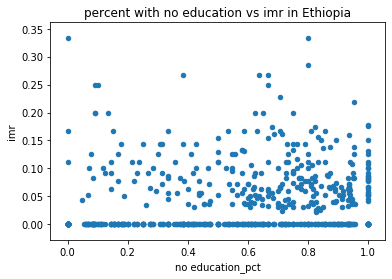

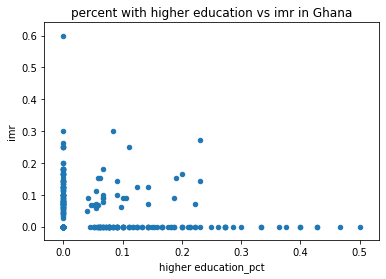

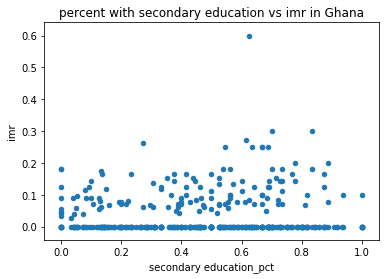

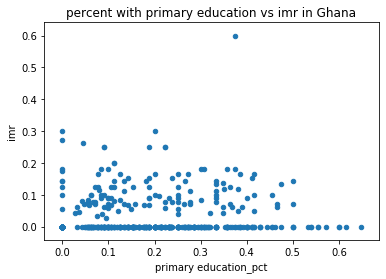

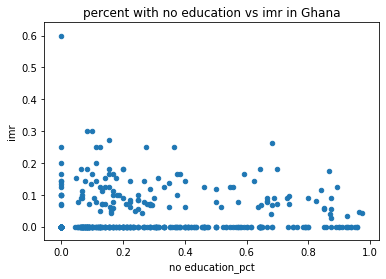

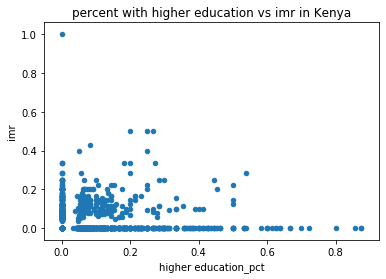

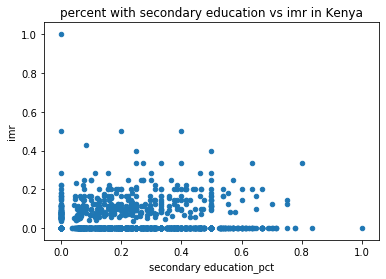

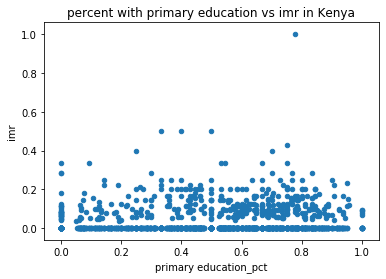

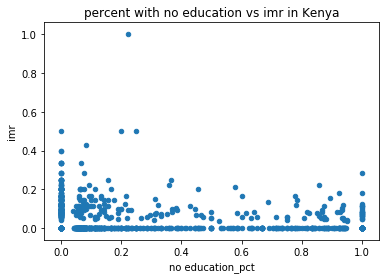

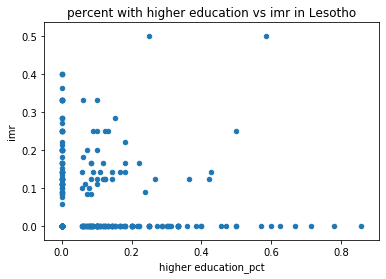

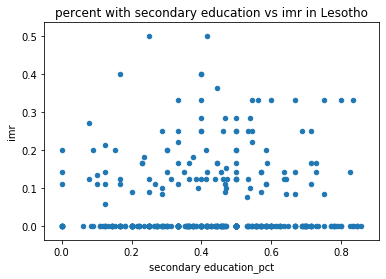

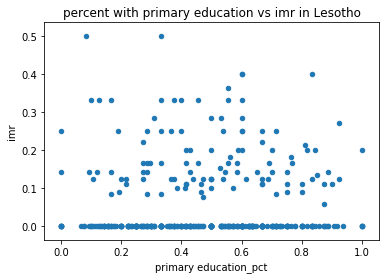

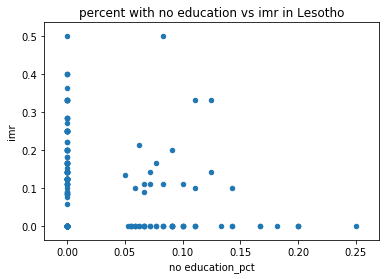

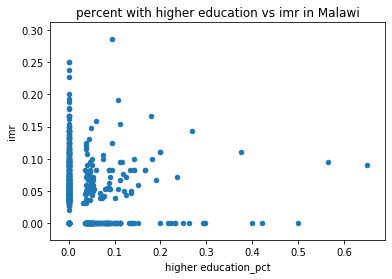

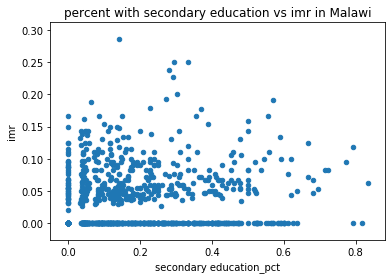

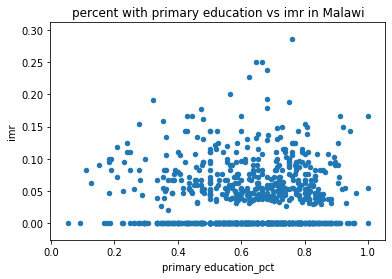

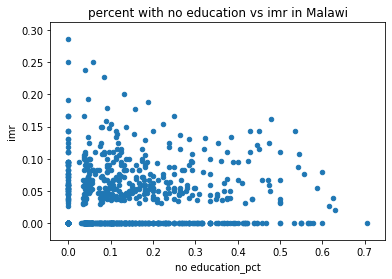

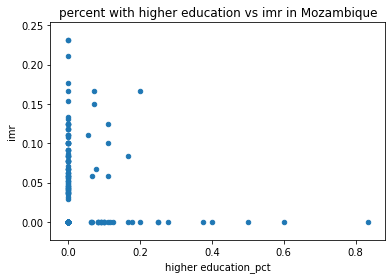

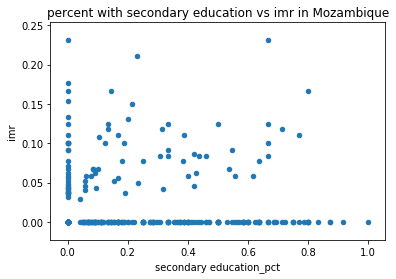

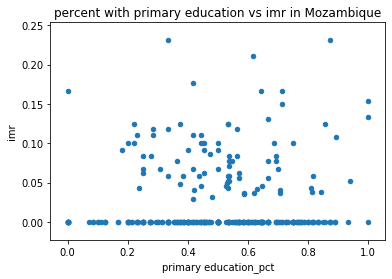

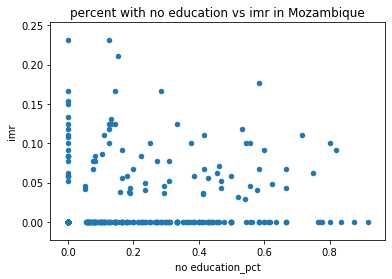

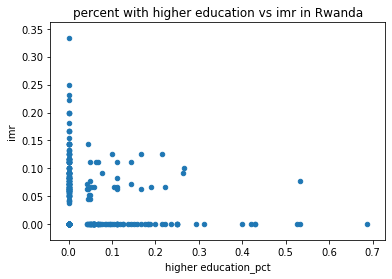

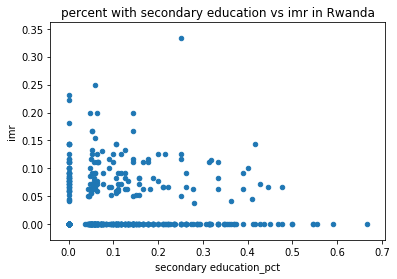

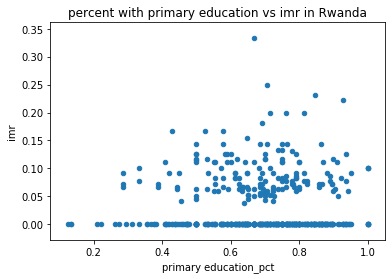

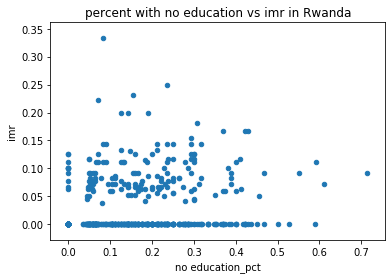

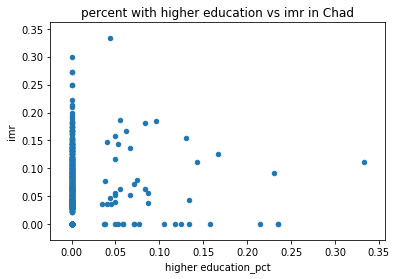

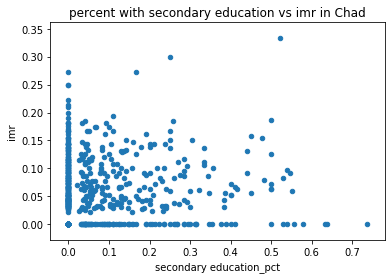

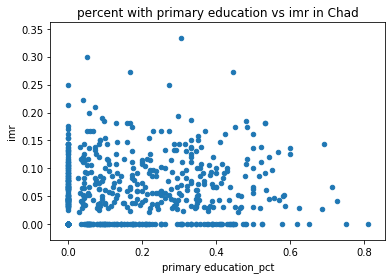

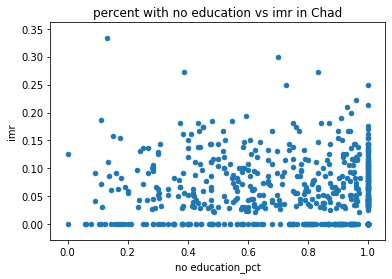

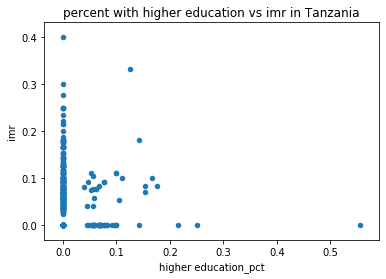

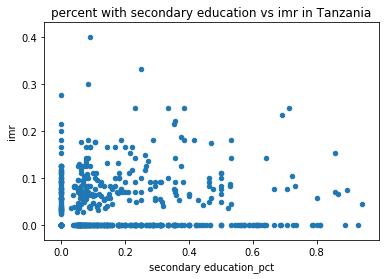

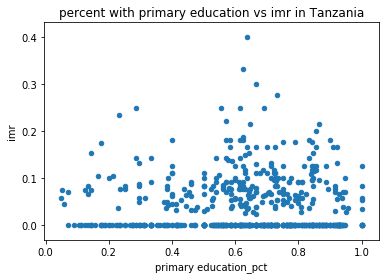

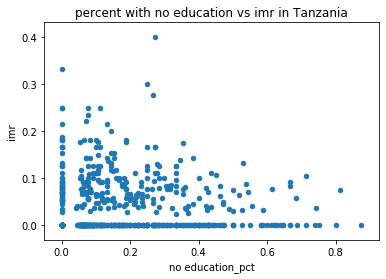

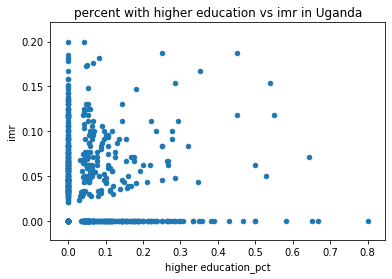

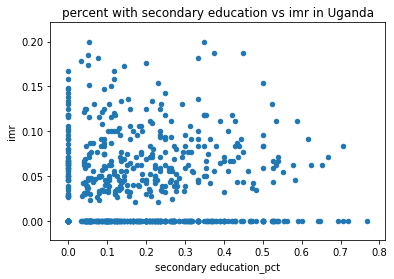

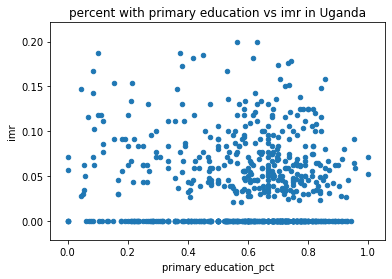

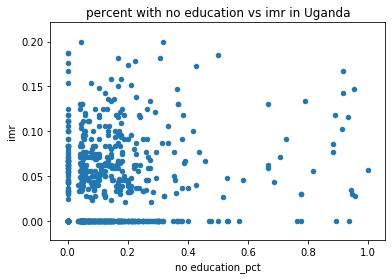

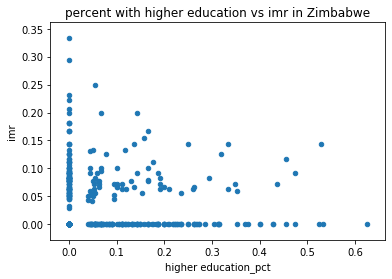

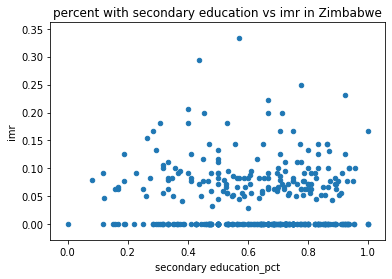

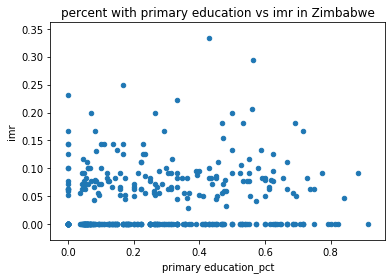

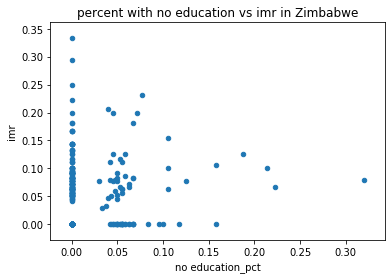

In [31]:
high_correlations = []
threshold = 0.1

for country in countries:
    for level in cat_to_meaning.values():
        cluster_level_combined_country = cluster_level_combined.loc[cluster_level_combined.country==country]
        title = "percent with {} vs imr in {}".format(level, country)
        ed_cat = "{}_pct".format(level)
        cluster_level_combined_country.plot(x=ed_cat, y='imr', kind='scatter', title=title)
        corr = cluster_level_combined_country[[ed_cat, 'imr']].corr('pearson').loc[ed_cat, 'imr']
        print('Pearson correlation of {} and imr in {}: {}'.format(level, country, corr))
        if abs(corr) >= threshold:
            high_correlations.append((level, country, corr))
            
print('\nAbsolute correlations greater than {}:'.format(threshold))
for level, country, corr in high_correlations:
    print('Pearson correlation of {} and imr in {}: {}'.format(level, country, corr))

Now, ignore where at least one of the two values is zero

In [32]:
high_correlations = []
threshold = 0.3

for country in countries:
    for level in cat_to_meaning.values():
        ed_cat = "{}_pct".format(level)
        cluster_level_combined_country = cluster_level_combined.loc[cluster_level_combined.country==country][[ed_cat, 'imr']]
        no_zeros = cluster_level_combined_country.loc[(cluster_level_combined_country!=0).all(axis=1)]
        corr = no_zeros.corr('pearson').loc[ed_cat, 'imr']
        print('Pearson correlation of {} and imr in {}: {}'.format(level, country, corr))
        if abs(corr) >= threshold:
            high_correlations.append((level, country, corr))
            
print('\nAbsolute correlations greater than {}:'.format(threshold))
for level, country, corr in high_correlations:
    print('Pearson correlation of {} and imr in {}: {}'.format(level, country, corr))
print(country_level_combined)


Pearson correlation of higher education and imr in Angola: 0.23446757534034784
Pearson correlation of secondary education and imr in Angola: -0.03536530159638904
Pearson correlation of primary education and imr in Angola: -0.05654479674002744
Pearson correlation of no education and imr in Angola: 0.11202630793760093
Pearson correlation of higher education and imr in Benin: 0.01413858960377667
Pearson correlation of secondary education and imr in Benin: -0.05982892337404171
Pearson correlation of primary education and imr in Benin: 0.19920023958939134
Pearson correlation of no education and imr in Benin: -0.11456782144820925
Pearson correlation of higher education and imr in Burundi: -0.04575227930964789
Pearson correlation of secondary education and imr in Burundi: 0.023184052385572595
Pearson correlation of primary education and imr in Burundi: 0.07602271758428135
Pearson correlation of no education and imr in Burundi: -0.07562033006617669
Pearson correlation of higher education and i

In [33]:
# imr_5yr_intensities_loc = os.path.join(data_dir, 'InfantMortality_Cluster5Year_intensities.csv')
# imr_5yr_intensities = pd.read_csv(imr_5yr_intensities_loc)
# print(imr_5yr_intensities)

# country level:
print('Pearson correlations of mean light intensity with categorized maternal education levels at the country level')
high_correlations_lights_ed = []
threshold = 0.3
for country in countries:
    for level in cat_to_meaning.values():
        ed_cat = "{}_pct".format(level)
        cluster_level_combined_country = cluster_level_combined.loc[cluster_level_combined.country==country][[ed_cat, 'mean_intensity']]
        no_zeros = cluster_level_combined_country.loc[(cluster_level_combined_country!=0).all(axis=1)]
        corr = no_zeros.corr('pearson').loc[ed_cat, 'mean_intensity']
        print('Pearson correlation of {} and mean light intensity in {}: {}'.format(level, country, corr))
        if abs(corr) >= threshold:
            high_correlations_lights_ed.append((level, country, corr))
            
print('\nAbsolute correlations greater than {}:'.format(threshold))
for level, country, corr in high_correlations:
    print('Pearson correlation of {} and mean lighting intensity in {}: {}'.format(level, country, corr))


print('\nPearson correlations of mean light intensity with IMR at the country level')
high_correlations_lights_imr = []
threshold = 0.3
for country in countries:
    cluster_level_combined_country = cluster_level_combined.loc[cluster_level_combined.country==country][['imr', 'mean_intensity']]
    no_zeros = cluster_level_combined_country.loc[(cluster_level_combined_country!=0).all(axis=1)]
    corr = no_zeros.corr('pearson').loc['imr', 'mean_intensity']
    print('Pearson correlation of IMR and mean light intensity in {}: {}'.format(country, corr))
    if abs(corr) >= threshold:
        high_correlations_lights_imr.append((country, corr))
            
print('\nAbsolute correlations greater than {}:'.format(threshold))
for country, corr in high_correlations:
    print('Pearson correlation of IMR and mean lighting intensity in {}: {}'.format(country, corr))

    


Pearson correlations of mean light intensity with categorized maternal education levels at the country level
Pearson correlation of higher education and mean light intensity in Angola: 0.024185194975160463
Pearson correlation of secondary education and mean light intensity in Angola: 0.4368235009882585
Pearson correlation of primary education and mean light intensity in Angola: -0.2171657339689942
Pearson correlation of no education and mean light intensity in Angola: -0.43206748713689697
Pearson correlation of higher education and mean light intensity in Benin: 0.32769833004140664
Pearson correlation of secondary education and mean light intensity in Benin: 0.48235888366123764
Pearson correlation of primary education and mean light intensity in Benin: 0.3947350914293867
Pearson correlation of no education and mean light intensity in Benin: -0.657062561747811
Pearson correlation of higher education and mean light intensity in Burundi: 0.5201284027653877
Pearson correlation of secondary

ValueError: too many values to unpack (expected 2)

Pearson correlations of mean light intensity with categorized maternal education levels at the cluster level
Pearson correlation of higher education and mean light intensity globally: 0.3712049213695906
Pearson correlation of secondary education and mean light intensity globally: 0.4292984243132022
Pearson correlation of primary education and mean light intensity globally: -0.29340093931923067
Pearson correlation of no education and mean light intensity globally: -0.24636111673981562
Pearson correlation of higher education and IMR: 0.3712049213695906
Pearson correlation of secondary education and IMR: 0.4292984243132022
Pearson correlation of primary education and IMR: -0.29340093931923067
Pearson correlation of no education and IMR: -0.24636111673981562

Pearson correlations of mean light intensity with IMR at the cluster level
Pearson correlation of IMR and mean light intensity globally: -0.06389707913272949
Pearson correlation of mean intensity and IMR: -0.06389707913272949


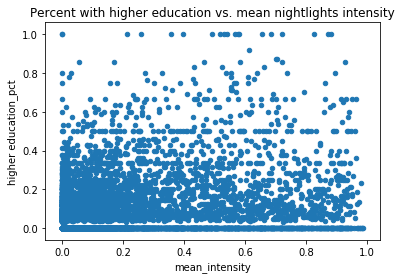

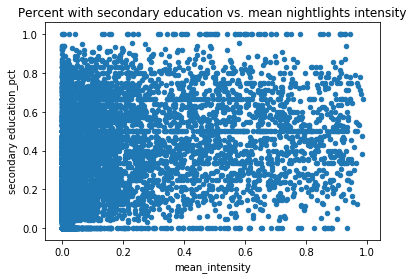

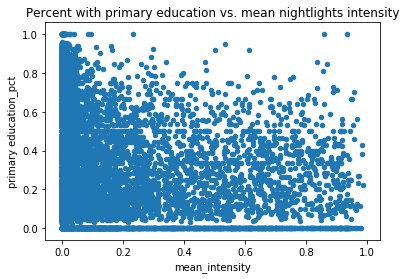

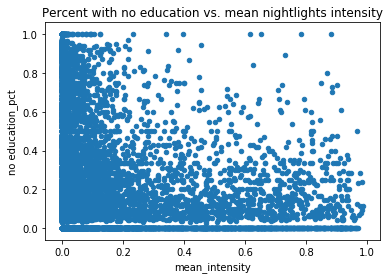

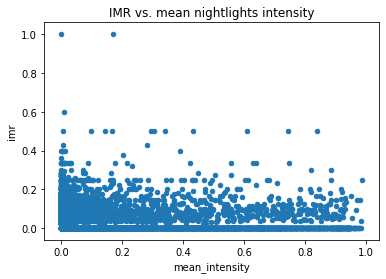

In [34]:
# cluster level:
print('Pearson correlations of mean light intensity with categorized maternal education levels at the cluster level')
high_correlations_lights_ed = []
threshold = 0.3
for level in cat_to_meaning.values():
    ed_cat = "{}_pct".format(level)
    corr = cluster_level_combined.corr('pearson').loc[ed_cat, 'mean_intensity']
#     no_zeros = cluster_level_combined.loc[(cluster_level_combined!=0).all(axis=1)]
#     corr = no_zeros.corr('pearson').loc[ed_cat, 'mean_intensity']
    print('Pearson correlation of {} and mean light intensity globally: {}'.format(level, corr))
#     if abs(corr) >= threshold:
#         high_correlations_lights_ed.append((level, corr))
            
# print('\nAbsolute correlations greater than {}:'.format(threshold))
# for level, corr in high_correlations:
#     print('Pearson correlation of {} and mean lighting intensity globally: {}'.format(level, corr))

ed_cat_titles = ['no education_pct', 'primary education_pct', 'secondary education_pct', 'higher education_pct']

for ed_cat, level in cat_to_meaning.items():
    ed_cat = "{}_pct".format(level)
    title = "Percent with {} vs. mean nightlights intensity".format(level)
    cluster_level_combined.plot(x='mean_intensity', y=ed_cat, kind='scatter', title=title)
    corr = cluster_level_combined[[ed_cat, 'mean_intensity']].corr('pearson').loc[ed_cat, 'mean_intensity']
    print('Pearson correlation of {} and IMR: {}'.format(level, corr))

print('\nPearson correlations of mean light intensity with IMR at the cluster level')
high_correlations_lights_imr = []
threshold = 0.3
# no_zeros = cluster_level_combined.loc[(cluster_level_combined!=0).all(axis=1)]
corr = cluster_level_combined.corr('pearson').loc['imr', 'mean_intensity']
print('Pearson correlation of IMR and mean light intensity globally: {}'.format(corr))
# if abs(corr) >= threshold:
#     high_correlations_lights_imr.append((corr))

# print('\nAbsolute correlations greater than {}:'.format(threshold))
# for corr in high_correlations:
#     print('Pearson correlation of IMR and mean lighting intensity globally: {}'.format(corr))

title = "IMR vs. mean nightlights intensity"
cluster_level_combined.plot(x='mean_intensity', y='imr', kind='scatter', title=title)
corr = cluster_level_combined[['imr', 'mean_intensity']].corr('pearson').loc['imr', 'mean_intensity']
print('Pearson correlation of mean intensity and IMR: {}'.format(corr))





In [47]:
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
params = {'legend.fontsize': 'xx-large',
         'legend.title_fontsize'    : 'xx-large',
         'figure.figsize': (25, 15),
        'axes.labelsize': 'xx-large',
        'axes.titlesize':'xx-large',
        'xtick.labelsize':'xx-large',
        'ytick.labelsize':'xx-large'}

pylab.rcParams.update(params)

imr_5yr['mean_intensity'].mean()

0.13081364084893504

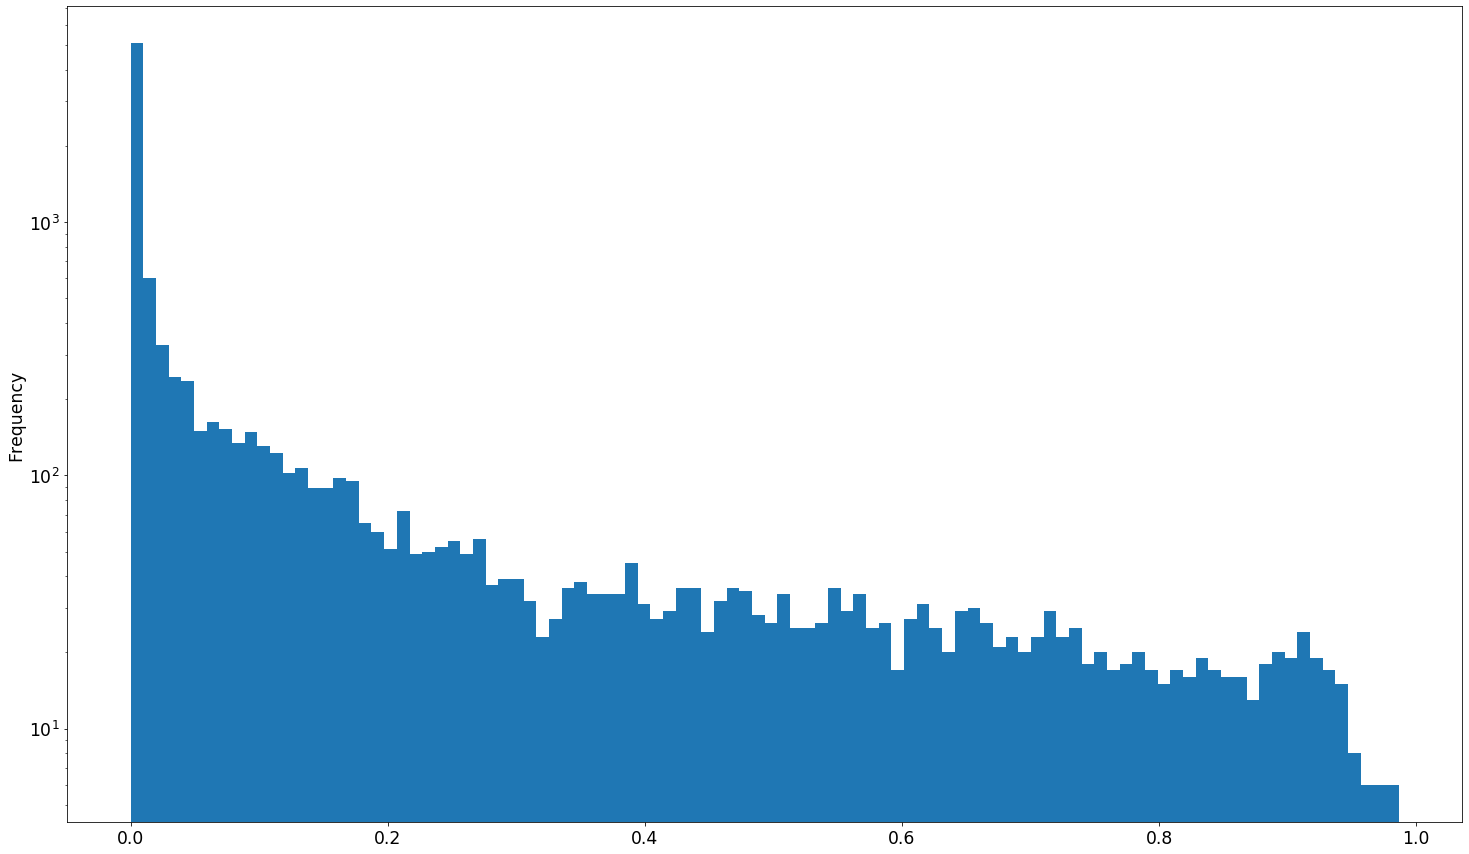

In [43]:
ax = cluster_level_combined['mean_intensity'].plot.hist(bins=100)
plt.yscale("log")
# plt.title('Histogram of mean nightlights intensity over all clusters')
# plt.xlabel('Mean normalized intensity')